In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Definir la ruta a la carpeta que contiene las subcarpetas "Healthy" y "Damaged"
dataset_path = "/content/drive/MyDrive/Victor/SateliteIA/Forest/"

# Cargar el dataset de imágenes
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',         # Las etiquetas se generan automáticamente a partir de las carpetas
    label_mode='binary',       # Como son dos clases, usamos binary para obtener 0 y 1
    batch_size=4,              # Tamaño del batch
    image_size=(224, 224),     # Todas las imágenes se redimensionarán a 224x224
    shuffle=True
)

# Normalizar las imágenes para que los valores de píxel estén entre 0 y 1
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))

# Definir la arquitectura de la red neuronal
model = models.Sequential([
    # Capa convolucional 1: 16 filtros de 3x3
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    # Capa convolucional 2: 32 filtros de 3x3
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Aplanar las salidas para conectarlas a la capa densa
    layers.Flatten(),

    # Capa densa oculta con 64 neuronas
    layers.Dense(64, activation='relu'),

    # Capa de salida: 1 neurona con activación sigmoide para clasificación binaria
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Mostrar el resumen del modelo
model.summary()


Found 40 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,972,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,977,185 (22.80 MB)

 Trainable params: 5,977,185 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# A continuación vamos a proceder a entrenar el modelo
# Definir el número de épocas
epochs = 10

# Entrenar el modelo
history = model.fit(
    train_dataset,
    epochs=epochs
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 586ms/step - accuracy: 0.7132 - loss: 1.2776
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.9653 - loss: 0.1956
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.9587 - loss: 0.1047
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - accuracy: 0.9468 - loss: 0.1324
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.9728 - loss: 0.0984
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.9868 - loss: 0.0789
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.9312 - loss: 0.1931
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.9785 - loss: 0.0941
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 0.9929 - loss: 0.0618
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 1.0000 - loss: 0.0072


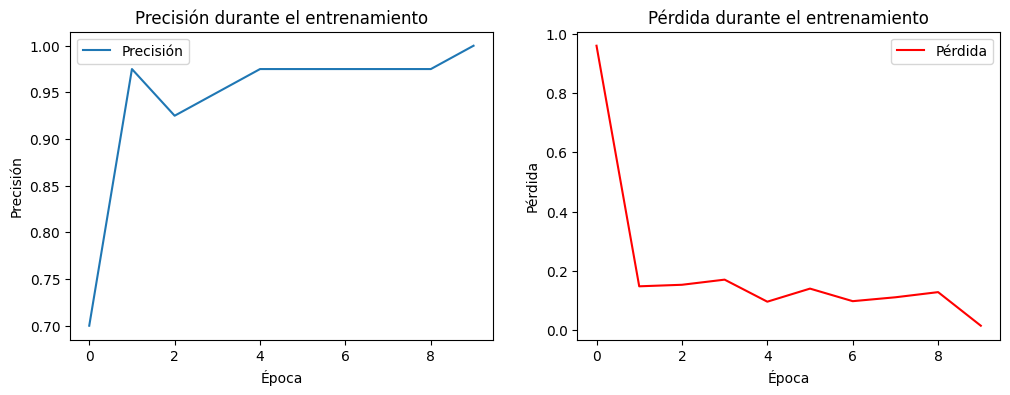

In [ ]:
import matplotlib.pyplot as plt

# Graficar la precisión durante el entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Graficar la pérdida durante el entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida', color='red')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


In [ ]:
# Guarda el modelo entrenado en una carpeta en Google Drive
model.save('/content/drive/MyDrive/Victor/SateliteIA/ForestModel.keras')


In [ ]:
# Instalamos Tensorflow para convertir el modelo
!pip install tensorflowjs

In [ ]:
model.save('/content/drive/MyDrive/Victor/SateliteIA/ForestModel.h5', save_format='h5')


In [ ]:
!tensorflowjs_converter --input_format=keras /content/drive/MyDrive/Victor/SateliteIA/ForestModel.h5 /content/drive/MyDrive/Victor/SateliteIA/ForestModelWeb


2025-02-17 17:14:57.361121: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739812497.397073   26599 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739812497.407781   26599 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
model.save('/content/drive/MyDrive/Victor/SateliteIA/ForestModel.keras')

In [ ]:
!tensorflowjs_converter --input_format=keras /content/drive/MyDrive/Victor/SateliteIA/ForestModel.keras /content/drive/MyDrive/Victor/SateliteIA/ForestModelWeb2

2025-02-17 19:44:22.728528: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739821462.766853   62675 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739821462.779054   62675 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
             ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tensorflowjs/converters/converter.py", line 959, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,972,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,954,372 (45.60 MB)

 Trainable params: 5,977,185 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,977,187 (22.80 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicción: [[0.9946511]]


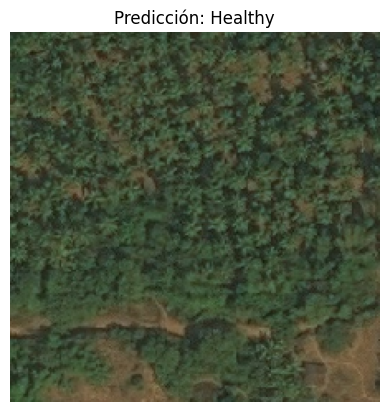

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Cargar el modelo en formato nativo (.keras)
model = tf.keras.models.load_model('/content/drive/MyDrive/Victor/SateliteIA/ForestModel.keras')

# Mostrar un resumen del modelo
model.summary()

# Cargar una imagen de prueba
img_path = '/content/drive/MyDrive/Victor/SateliteIA/ForestTestImages/71619_sat_58.jpg'  # ajusta la ruta
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Añadir la dimensión de batch

# Realizar la predicción
prediction = model.predict(img_array)
print("Predicción:", prediction)

# Visualizar la imagen
plt.imshow(img)
plt.title("Predicción: " + ("Healthy" if prediction[0][0] > 0.5 else "Damaged"))
plt.axis('off')
plt.show()


In [30]:
model.export('/content/drive/MyDrive/Victor/SateliteIA/ForestModel_SavedModel')

Saved artifact at '/content/drive/MyDrive/Victor/SateliteIA/ForestModel_SavedModel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140651645766928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140651645764816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140651645764624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140651645770960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140651645764240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140651645770192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140651645771536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140651645769424: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [31]:
!tensorflowjs_converter --input_format=tf_saved_model /content/drive/MyDrive/Victor/SateliteIA/ForestModel_SavedModel /content/drive/MyDrive/Victor/SateliteIA/ForestModelWebSaved


2025-02-17 19:58:21.110572: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739822301.149489   66131 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739822301.157510   66131 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-02-17 19:58:26.230459: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
I0000 00:00:1739822306.506546   66131 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00